In [1]:
# Import our dependencies
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
# Import data from database
con = sqlite3.connect('HouseInfo.db')
df = pd.read_sql_query('Select * from Selling', con)
df = pd.DataFrame(df)
df.head()

,City,HouseName,Lng,Lat,District,id,TotalPrice,Price,Floor,Square,FloorType,BuildingType,BuildingStructure,RenovationCondition,Elevator,ConstructionTime,BedRooms,LivingRooms,Kitchen,BathRooms
0,beijing,富力又一城B区,116.568935,39.852754,朝阳,101112779955,7950000.0,50579,High,157.18,Flat,Plate,Steel/Concrete,Hardcover,Yes,2008,3,2,1,2
1,beijing,白广路7号院,116.363689,39.890353,西城,101112823905,6350000.0,109805,Low,57.83,Flat,Plate,Mixed,Other,No,1984,2,1,1,1
2,beijing,莱茵河畔,116.479698,39.803397,亦庄开发区,101112557404,5850000.0,54072,Low,108.19,Flat,Plate,Steel/Concrete,Hardcover,Yes,2003,2,1,1,1
3,beijing,瑞海家园五区,116.343366,39.789172,大兴,101112573961,5090000.0,46379,First Floor,109.75,Flat,Plate,Mixed,Hardcover,No,2004,3,1,1,1
4,beijing,合生世界村,116.552980,39.743074,通州,101111602994,2730000.0,30063,Middle,90.81,Flat,Plate,Steel/Concrete,Hardcover,Yes,2011,2,1,1,1


In [5]:
df = df.drop(['Price', 'Square', 'HouseName', 'id', 'Lng', 'Lat', 'ConstructionTime'],axis=1)
df.head()

,City,District,TotalPrice,Floor,FloorType,BuildingType,BuildingStructure,RenovationCondition,Elevator,BedRooms,LivingRooms,Kitchen,BathRooms
0,beijing,朝阳,7950000.0,High,Flat,Plate,Steel/Concrete,Hardcover,Yes,3,2,1,2
1,beijing,西城,6350000.0,Low,Flat,Plate,Mixed,Other,No,2,1,1,1
2,beijing,亦庄开发区,5850000.0,Low,Flat,Plate,Steel/Concrete,Hardcover,Yes,2,1,1,1
3,beijing,大兴,5090000.0,First Floor,Flat,Plate,Mixed,Hardcover,No,3,1,1,1
4,beijing,通州,2730000.0,Middle,Flat,Plate,Steel/Concrete,Hardcover,Yes,2,1,1,1


In [94]:
df.replace(to_replace=r'Unknown', value=np.nan, regex=True, inplace=True)

In [95]:
df.isnull().sum()

City                     0
District                 0
TotalPrice               0
Floor                    0
FloorType               10
BuildingType             0
BuildingStructure       22
RenovationCondition      0
Elevator               186
BedRooms                 0
LivingRooms              0
Kitchens                 0
BathRooms                0
dtype: int64

In [96]:
df = df.dropna()

df.isnull().sum()

City                   0
District               0
TotalPrice             0
Floor                  0
FloorType              0
BuildingType           0
BuildingStructure      0
RenovationCondition    0
Elevator               0
BedRooms               0
LivingRooms            0
Kitchens               0
BathRooms              0
dtype: int64

## Encoding

In [97]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

df['City'] = labelencoder.fit_transform(df['City'])
df['District'] = labelencoder.fit_transform(df['District'])
df['Floor'] = labelencoder.fit_transform(df['Floor'])
df['Elevator'] = labelencoder.fit_transform(df['Elevator'])
df['FloorType'] = labelencoder.fit_transform(df['FloorType'])
df['BuildingType'] = labelencoder.fit_transform(df['BuildingType'])
df['BuildingStructure'] = labelencoder.fit_transform(df['BuildingStructure'])
df['RenovationCondition'] = labelencoder.fit_transform(df['RenovationCondition'])

In [98]:
df.head()

## Correlation Heatmap

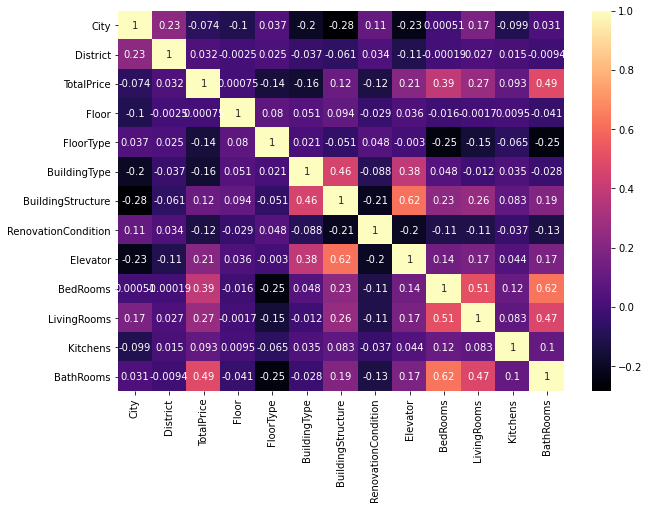

In [9]:
fig,ax = plt.subplots(figsize=(10,7))
sns.heatmap(df.corr(), annot = True, cmap = 'magma',ax=ax)

# plt.savefig('heatmap.png')
plt.show()

In [10]:
corrmat = df.corr()
print(corrmat['TotalPrice'].sort_values(ascending=False))

TotalPrice             1.000000
BathRooms              0.493111
BedRooms               0.386118
LivingRooms            0.266256
Elevator               0.209240
BuildingStructure      0.120208
Kitchens               0.092721
District               0.032385
Floor                  0.000754
City                  -0.073862
RenovationCondition   -0.124621
FloorType             -0.142835
BuildingType          -0.160221
Name: TotalPrice, dtype: float64


## Calculate Statistics

In [15]:
# Minimum price of the data
minimum_price = np.amin(df['TotalPrice'])

# Maximum price of the data
maximum_price = np.amax(df['TotalPrice'])

# Mean price of the data
mean_price = np.mean(df['TotalPrice'])

# Median price of the data
median_price = np.median(df['TotalPrice'])

# Standard deviation of prices of the data
std_price = np.std(df['TotalPrice'])

# Show the calculated statistics
print("Statistics for Selling dataset:\n")
print("Minimum price: ￥{}".format(minimum_price)) 
print("Maximum price: ￥{}".format(maximum_price))
print("Mean price: ￥{}".format(mean_price))
print("Median price ￥{}".format(median_price))
print("Standard deviation of prices: ￥{}".format(std_price))

Statistics for Selling dataset:

Minimum price: ￥250000
Maximum price: ￥98000000
Mean price: ￥4799642.322404372
Median price ￥3755000.0
Standard deviation of prices: ￥4225947.181730324


In [16]:
# cols_to_dummies = ['City','District','Floor','FloorType','BuildingType','BuildingStructure','RenovationCondition','Elevator']
# df = pd.get_dummies(data=df, columns=cols_to_dummies)
# df = df.dropna()
# df.head()

# Machine Learning

## Spliting into training and testing dataset

In [17]:
X = df.drop(['TotalPrice'], axis = 1)
y = df['TotalPrice']

In [18]:
print(X.shape)
print(y.shape)

(7320, 12)
(7320,)


In [19]:
# split data to 80% of training and 20% of testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=47)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5856, 12)
(1464, 12)
(5856,)
(1464,)


## Standardization

In [21]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
# cols_to_norm = ['Square','ConstructionTime','BedRooms','LivingRooms','Kitchens','BathRooms','Lng','Lat']
# scaler = MinMaxScaler()

# X_train[cols_to_norm] = scaler.fit_transform(X_train[cols_to_norm])
# X_test[cols_to_norm] = scaler.transform(X_test[cols_to_norm])

# X_train.head()

## Multiple Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print(lr_model.score(X_train, y_train))
print(lr_model.score(X_test, y_test))

0.3358946787240613
0.31102307239188565


In [24]:
# prediction
y_pred_lr = lr_model.predict(X_test)

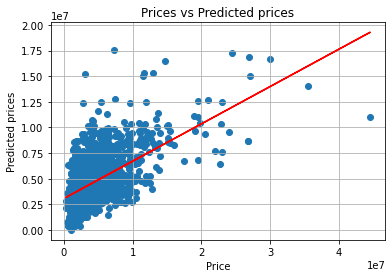

In [25]:
# visualization
y1_test = y_test.values.reshape(-1,1)

lr_model = LinearRegression()
lr_model.fit(y1_test, y_pred_lr)
y1_pred_lr = lr_model.predict(y1_test)

plt.scatter(y1_test, y_pred_lr)
plt.xlabel("Price")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.grid()

plt.plot(y1_test, y1_pred_lr, color='red')
plt.show()

In [26]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# predicting the accuracy score
print('r2 socre is ', r2_score(y_test, y_pred_lr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))

r2 socre is  0.31102307239188565
Root Mean Squared Error: 3108017.500339511


The value of root mean squared error is higher than 10% of the mean value of price (i.e. ￥4799642). This means that our algorithm was not very accurate.

## Decision Tree

In [27]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

print(dt_model.score(X_train, y_train))
print(dt_model.score(X_test, y_test))

0.9551735217852773
0.4595485462291288


In [28]:
# prediction
y_pred_dt = dt_model.predict(X_test)

In [29]:
from sklearn import metrics
print('r2 socre is ', r2_score(y_test, y_pred_dt))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt)))

r2 socre is  0.4595485462291288
Root Mean Squared Error: 2752703.6641044305


## Random Forest

In [30]:
# Find optimal n_estimator for the model
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid ={
    'n_estimators': [20, 100, 500, 1000, 5000]
}

rf_model = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv=3, n_jobs=-1)

grid_search.fit(X_train, y_train)

grid_search.best_params_

{'n_estimators': 5000}

In [31]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=47)
rf_model.fit(X_train, y_train)

print(rf_model.score(X_train, y_train))
print(rf_model.score(X_test, y_test))

0.9146999496986061
0.6443363506540841


In [32]:
# prediction
y_pred_rf = rf_model.predict(X_test)

In [33]:
from sklearn import metrics
print('r2 socre is ', r2_score(y_test, y_pred_rf))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

r2 socre is  0.6443363506540841
Root Mean Squared Error: 2233062.3865423324


## SVR

In [34]:
from sklearn.svm import SVR

svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)

print(svr_model.score(X_train, y_train))
print(svr_model.score(X_test, y_test))

-0.06169396248415393
-0.053226188013953735


In [35]:
# prediction
y_pred_svr = svr_model.predict(X_test)

In [36]:
from sklearn import metrics
print('r2 socre is ', r2_score(y_test, y_pred_svr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_svr)))

r2 socre is  -0.053226188013953735
Root Mean Squared Error: 3842748.31503099


## LightGBM Regression

In [37]:
import lightgbm as lgb
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train, y_train)

print(lgb_model.score(X_train, y_train))
print(lgb_model.score(X_test, y_test))

0.7946330232645791
0.671371256934024


In [38]:
# prediction
y_pred_lgb = lgb_model.predict(X_test)

In [39]:
from sklearn import metrics
print('r2 socre is ', r2_score(y_test, y_pred_lgb))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lgb)))

r2 socre is  0.671371256934024
Root Mean Squared Error: 2146514.8092800668


## Lasso

In [40]:
# Find optimal alpha for the model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alphas = np.array([1, 0.5, 0.1, 0.01, 0])

lasso_model = Lasso()
grid_search = GridSearchCV(estimator = lasso_model, param_grid = dict(alpha=alphas))

grid_search.fit(X_train, y_train)

grid_search.best_estimator_.alpha

C:\Users\86189\anaconda3\envs\mlenv\lib\site-packages\sklearn\model_selection\_validation.py:593: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\86189\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\86189\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.803580190315137e+16, tolerance: 8283611621355.81
  positive)
C:\Users\86189\anaconda3\envs\mlenv\lib\site-packages\sklearn\model_selection\_validation.py:593: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit

1.0

In [41]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

print(lasso_model.score(X_train, y_train))
print(lasso_model.score(X_test, y_test))

0.33589467872310996
0.31102316523363394


In [42]:
# prediction
y_pred_lasso = lasso_model.predict(X_test)

In [43]:
from sklearn import metrics
print('r2 socre is ', r2_score(y_test, y_pred_lasso))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)))

r2 socre is  0.31102316523363394
Root Mean Squared Error: 3108017.290932072


## KNN

In [44]:
# Find optimal n_neighbors for the model
from sklearn.neighbors import KNeighborsRegressor

parameter_space = {
    "n_neighbors": [8, 9, 10, 11, 30],
    "weights": ["uniform", "distance"],
    "algorithm": ["ball_tree", "kd_tree", "brute"],
    "leaf_size": [1, 2, 20, 50, 200]
}

knn_model = KNeighborsRegressor()

grid_search = GridSearchCV(knn_model, parameter_space, cv=3, n_jobs=-1)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'algorithm': 'kd_tree', 'leaf_size': 20, 'n_neighbors': 9, 'weights': 'distance'}


In [45]:
knn_model = KNeighborsRegressor(n_neighbors=9, weights='distance', algorithm='kd_tree', leaf_size=20)
knn_model.fit(X_train, y_train)

print(knn_model.score(X_train, y_train))
print(knn_model.score(X_test, y_test))

0.9548869257646905
0.5381014569732786


In [46]:
# prediction
y_pred_knn = knn_model.predict(X_test)

In [47]:
from sklearn import metrics
print('r2 socre is ', r2_score(y_test, y_pred_knn))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)))

r2 socre is  0.5381014569732786
Root Mean Squared Error: 2544804.431783201


## Compare scores of each model

In [48]:
for reg in (lr_model, dt_model, rf_model, lgb_model, svr_model, knn_model, lasso_model):
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    print(reg.__class__.__name__, "Mean Squared Error:", mean_squared_error(y_test, y_pred)/100000000)
    print(reg.__class__.__name__, "R2:", r2_score(y_test, y_pred))

LinearRegression Mean Squared Error: 96597.72782416662
LinearRegression R2: 0.31102307239188565
DecisionTreeRegressor Mean Squared Error: 86920.60305308079
DecisionTreeRegressor R2: 0.3800445270683286
RandomForestRegressor Mean Squared Error: 49865.676221901376
RandomForestRegressor R2: 0.6443363506540841
LGBMRegressor Mean Squared Error: 46075.25826458642
LGBMRegressor R2: 0.671371256934024
SVR Mean Squared Error: 147667.14612673514
SVR R2: -0.053226188013953735
KNeighborsRegressor Mean Squared Error: 64760.29596023421
KNeighborsRegressor R2: 0.5381014569732786
Lasso Mean Squared Error: 96597.71480732734
Lasso R2: 0.31102316523363394


## Result for now

We choose LGBMRegressor since it has lowest MSE and highest R2 score, meaning that it has most data being explained by our model.
However, it seems that we still need some improvement to our model because the R2 score is not good enough.
We can drop some features to improve the result, but before dropping features, we need to figure out which feature is important and which one is not.
To do so, we can list the feature importance lists.
We ignore the SVR model because the score is too bad.
We can list their feature importance lists, however, we only have the feature index and we don't have the feature name, we need to add the feature names on our feature importance lists. 


# Improvement on models

In [49]:
from sklearn.inspection import permutation_importance

# feature importance list
lr_importance = lr_model.coef_
dt_importance = dt_model.feature_importances_
rf_importance = rf_model.feature_importances_
lgb_importance = lgb_model.feature_importances_
knn_results = permutation_importance(knn_model, X_test, y_test, scoring='neg_mean_squared_error')
knn_importance = knn_results.importances_mean

In [50]:
# first find all names of those features 
feature_names = X.columns
print(feature_names)

Index(['City', 'District', 'Floor', 'FloorType', 'BuildingType',
       'BuildingStructure', 'RenovationCondition', 'Elevator', 'BedRooms',
       'LivingRooms', 'Kitchens', 'BathRooms'],
      dtype='object')


In [51]:
lr_importance_df = pd.DataFrame(lr_importance,index = feature_names)
lr_importance_df.head()

,0
City,-4.537198e+05
District,2.900559e+05
Floor,8.830336e+04
FloorType,-6.855418e+04
BuildingType,-1.018606e+06


In [52]:
sel_lr_df = lr_importance_df.loc[lr_importance_df[0] > 0]
sel_lr_df.head()

,0
District,290055.877719
Floor,88303.359499
Elevator,963027.907428
BedRooms,606164.166771
Kitchens,119211.227868


In [53]:
dt_importance_df = pd.DataFrame(dt_importance,index = feature_names)
dt_importance_df.head()

,0
City,0.090617
District,0.235760
Floor,0.033487
FloorType,0.034862
BuildingType,0.063574


In [54]:
sel_dt_df = dt_importance_df.loc[dt_importance_df[0] > 0]
sel_dt_df.head()

,0
City,0.090617
District,0.235760
Floor,0.033487
FloorType,0.034862
BuildingType,0.063574


In [55]:
rf_importance_df = pd.DataFrame(rf_importance,index = feature_names)
rf_importance_df.head()

,0
City,0.106664
District,0.218682
Floor,0.045057
FloorType,0.037415
BuildingType,0.079986


In [56]:
sel_rf_df = rf_importance_df.loc[rf_importance_df[0] > 0]
sel_rf_df.head()

,0
City,0.106664
District,0.218682
Floor,0.045057
FloorType,0.037415
BuildingType,0.079986


In [57]:
lgb_importance_df = pd.DataFrame(lgb_importance,index = feature_names)
lgb_importance_df.head()

,0
City,245
District,1203
Floor,163
FloorType,138
BuildingType,167


In [58]:
sel_lgb_df = lgb_importance_df.loc[lgb_importance_df[0] > 0]
sel_lgb_df.head()

,0
City,245
District,1203
Floor,163
FloorType,138
BuildingType,167


In [59]:
knn_importance_df = pd.DataFrame(knn_importance,index = feature_names)
knn_importance_df.head()

,0
City,2.784230e+12
District,2.908372e+12
Floor,4.474411e+11
FloorType,7.123608e+11
BuildingType,1.524072e+12


In [60]:
sel_knn_df = knn_importance_df.loc[knn_importance_df[0] > 0]
sel_knn_df.head()

,0
City,2.784230e+12
District,2.908372e+12
Floor,4.474411e+11
FloorType,7.123608e+11
BuildingType,1.524072e+12


In [61]:
# select features which is relatively important in each model 
sel_lr_index = sel_lr_df.index
sel_dt_index = sel_dt_df.index
sel_rf_index = sel_rf_df.index
sel_lgb_index = sel_lgb_df.index
sel_knn_index = sel_knn_df.index

In [62]:
# Union all important features of these 3 models 
union_1 = np.union1d(sel_lr_index, sel_dt_index)
union_2 = np.union1d(union_1, sel_rf_index)
union_3 = np.union1d(union_2, sel_lgb_index)
union_4 = np.union1d(union_3, sel_knn_index)
union = np.append(union_4,'TotalPrice')

In [63]:
df_important = df[union]
df_important

,BathRooms,BedRooms,BuildingStructure,BuildingType,City,District,Elevator,Floor,FloorType,Kitchens,LivingRooms,RenovationCondition,TotalPrice
0,2,3,4,2,0,19,1,2,1,1,2,0,7950000
1,1,2,2,2,0,31,0,3,1,1,1,1,6350000
2,1,2,4,2,0,2,1,3,1,1,1,0,5850000
3,1,3,2,2,0,7,0,1,1,1,1,0,5090000
4,1,2,4,2,0,33,1,4,1,1,1,0,2730000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7516,1,3,4,4,1,41,1,4,1,1,2,0,5380000
7517,1,2,4,4,1,32,0,4,1,1,1,3,1680000
7518,1,2,4,4,1,29,1,2,1,1,2,3,3800000
7519,1,2,4,4,1,29,0,2,1,1,1,0,1200000


# Model again

## Split dataset

In [64]:
# Split dataset
X_imp = df_important.drop(['TotalPrice'], axis = 1)
y_imp = df_important['TotalPrice']

In [65]:
print(X_imp.shape)
print(y_imp.shape)

(7320, 12)
(7320,)


In [66]:
# split data to 80% of training and 20% of testing
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X_imp, y_imp, test_size=0.2, random_state=47)

In [67]:
print(X_train_imp.shape)
print(X_test_imp.shape)
print(y_train_imp.shape)
print(y_test_imp.shape)

(5856, 12)
(1464, 12)
(5856,)
(1464,)


## Standardize

In [68]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_imp = sc.fit_transform(X_train_imp)
X_test_imp = sc.transform(X_test_imp)

## Multiple Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train_imp, y_train_imp)

print(lr_model.score(X_train_imp, y_train_imp))
print(lr_model.score(X_test_imp, y_test_imp))

0.3358946787240613
0.31102307239188587


In [70]:
# prediction
y_pred_lr_imp = lr_model.predict(X_test_imp)

print('r2 socre is ', r2_score(y_test_imp, y_pred_lr_imp))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_imp, y_pred_lr_imp)))

r2 socre is  0.31102307239188587
Root Mean Squared Error: 3108017.5003395104


## Decision Tree

In [71]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_imp, y_train_imp)

print(dt_model.score(X_train_imp, y_train_imp))
print(dt_model.score(X_test_imp, y_test_imp))

0.9551735217852773
0.27686447137564363


In [72]:
# prediction
y_pred_dt_imp = dt_model.predict(X_test_imp)

print('r2 socre is ', r2_score(y_test_imp, y_pred_dt_imp))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_imp, y_pred_dt_imp)))

r2 socre is  0.27686447137564363
Root Mean Squared Error: 3184131.286285501


## Random Forest Regression

In [73]:
# Find optimal n_estimator for the model
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid ={
    'n_estimators': [20, 100, 500, 1000, 5000]
}

rf_model = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv=3, n_jobs=-1)

grid_search.fit(X_train, y_train)

grid_search.best_params_

{'n_estimators': 100}

In [74]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=47)
rf_model.fit(X_train, y_train)

print(rf_model.score(X_train, y_train))
print(rf_model.score(X_test, y_test))

0.9146999496986061
0.6443363506540841


In [75]:
# prediction
y_pred_rf = rf_model.predict(X_test)

print('r2 socre is ', r2_score(y_test, y_pred_rf))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

r2 socre is  0.6443363506540841
Root Mean Squared Error: 2233062.3865423324


## LGBM Regression

In [76]:
import lightgbm as lgb
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train_imp, y_train_imp)

print(lgb_model.score(X_train_imp, y_train_imp))
print(lgb_model.score(X_test_imp, y_test_imp))

0.7946330232645791
0.671371256934024


In [77]:
# prediction
y_pred_lgb_imp = lgb_model.predict(X_test_imp)

print('r2 socre is ', r2_score(y_test_imp, y_pred_lgb_imp))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_imp, y_pred_lgb_imp)))

r2 socre is  0.671371256934024
Root Mean Squared Error: 2146514.8092800668


## KNN Regression

In [78]:
# Find optimal n_neighbors for the model
from sklearn.neighbors import KNeighborsRegressor

parameter_space = {
    "n_neighbors": [8, 9, 10, 11, 30],
    "weights": ["uniform", "distance"],
    "algorithm": ["ball_tree", "kd_tree", "brute"],
    "leaf_size": [1, 2, 20, 50, 200]
}

knn_model = KNeighborsRegressor()

grid_search = GridSearchCV(knn_model, parameter_space, cv=3, n_jobs=-1)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'algorithm': 'kd_tree', 'leaf_size': 20, 'n_neighbors': 9, 'weights': 'distance'}


In [79]:
knn_model = KNeighborsRegressor(n_neighbors=9, weights='distance', algorithm='kd_tree', leaf_size=20)
knn_model.fit(X_train_imp, y_train_imp)

print(knn_model.score(X_train_imp, y_train_imp))
print(knn_model.score(X_test_imp, y_test_imp))

0.9548869257646905
0.5381014569732786


In [80]:
# prediction
y_pred_knn_imp = knn_model.predict(X_test_imp)

print('r2 socre is ', r2_score(y_test_imp, y_pred_knn_imp))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_imp, y_pred_knn_imp)))

r2 socre is  0.5381014569732786
Root Mean Squared Error: 2544804.431783201


# Using best model (LGBM) to predict selling prices

In [81]:
df.head()

,City,District,TotalPrice,Floor,FloorType,BuildingType,BuildingStructure,RenovationCondition,Elevator,BedRooms,LivingRooms,Kitchens,BathRooms
0,0,19,7950000,2,1,2,4,0,1,3,2,1,2
1,0,31,6350000,3,1,2,2,1,0,2,1,1,1
2,0,2,5850000,3,1,2,4,0,1,2,1,1,1
3,0,7,5090000,1,1,2,2,0,0,3,1,1,1
4,0,33,2730000,4,1,2,4,0,1,2,1,1,1


`Meaning of each number`

|  | City | District | Floor | FloorType | BuildingType | BuildingStructure | RenovationCondition | Elevator |
|---|---|---|---|---|---|---|---|---|
| 0 | Beijing | Dongcheng  | Basement | Duplex | Bungalow | Brick/Concrete | Hardcover | No |
| 1 | Guangzhou | Fengtai | FirstFloor | Flat | Other | Brick/Wood | Other | Yes |
| 2 | Shanghai | Yizhuang | High | Other |  Plate | Mixed | Rough |
| 3 |  | Conghua | Low | Split-Level | Plate&Tower | Steel | Simplicity |
| 4 |  | Nansha | Middle |  | Tower | Steel/Concrete |
| 5 |  | Jiading | Top | 
| 6 |  | Zengcheng |
| 7 |  | Daxing |
| 8 |  | Tianhe |
| 9 |  | Fengxian |
| 10 |  | Baoshan |
| 11 |  | Miyun |
| 12 |  | Chongming |
| 13 |  | Yanqing |
| 14 |  | Xuhui |
| 15 |  | Huairou |
| 16 |  | Fangshan |
| 17 |  | Changping |
| 18 |  | Putuo |
| 19 |  | Chaoyang |
| 20 |  | Yangpu |
| 21 |  | Songjiang |
| 22 |  | Pudong |
| 23 |  | Haiding |
| 24 |  | Haizhu |
| 25 |  | Panyu |
| 26 |  | Baiyun |
| 27 |  | Shijingshan |
| 28 |  | Huadu |
| 29 |  | Liwan |
| 30 |  | Hongkou |
| 31 |  | Xicheng |
| 32 |  | Yuexiu |
| 33 |  | Tongzhou |
| 34 |  | Jinshan |
| 35 |  | Changning |
| 36 |  | Mentouhong |
| 37 |  | Minhang |
| 38 |  | Qingpu |
| 39 |  | Jingan |
| 40 |  | Shunyi |
| 41 |  | Huangpu |
| 42 |  | Huangpu |


`Enter the features of the house that clients want to buy`

| Feature | Client 1 |
| --- | --- | 
| City | 1 |
| District | 1 |
| Floor | 1 |
| FloorType | 1 |
| BuildingType | 1 |
| BuildingStructure | 1 |
| RenovationCondition | 1 |
| Elevator | 1 |
| Bedrooms | 1 |
| Living Rooms | 1 |
| Kitchen | 1 |
| Bathrooms | 1 |

In [99]:
# Produce a matrix for client data
client_data = [[2, 14, 2, 0, 3, 3, 2, 1, 2, 1, 1, 2]] # client 1

# show predictions
price = rf_model.predict(client_data)
print(f"Predicted selling price for Client 1's home: ${price}")

Predicted selling price for Client 1's home: $[11866450.]
